# Задача

Целевая переменная

* **SeriousDlqin2yrs**: Клиент имел просрочку 90 и более дней
* **RevolvingUtilizationOfUnsecuredLines**: Общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits).
* **age**: Возраст заемщика
* **NumberOfTime30-59DaysPastDueNotWorse**: Сколько раз за последние 2 года наблюдалась просрочка 30-59 дней.
* **DebtRatio**: Ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход.
* **MonthlyIncome**: Ежемесячный доход.
* **NumberOfOpenCreditLinesAndLoans**: Количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт.
* **NumberOfTimes90DaysLate**: Сколько раз наблюдалась просрочка (90 и более дней).
* **NumberRealEstateLoansOrLines**: Количество кредиов (в том числе под залог жилья)
* **NumberOfTime60-89DaysPastDueNotWorse**: Сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней.
* **NumberOfDependents**: Количество иждивенцев на попечении (супруги, дети и др).

## Outline
1. EDA
    1. Описательные статистики:
        * Кол-во данных
        * Мин, Макс
        * Среднее, дисперсию
        * Процентили
    2. Графики
        * Гистограммы
        * Точечные диаграммы
        * Боксплоты
2. Лог регрессия
3. OneHotEncoding 
4. Бустинг

## Подключение основных библиотек


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RANDOM_STATE = 42

In [3]:
df = pd.read_csv('credit_scoring_dataset.csv', index_col=0)

## EDA

### Описательные статистики

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [8]:
df[df['SeriousDlqin2yrs'] == 0].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,139974.0,139974.000000,139974.000000,139974.000000,139974.000000,1.119120e+05,139974.000000,139974.000000,139974.000000,139974.000000,136229.000000
mean,0.0,6.168855,52.751375,0.280109,357.151168,6.747838e+03,8.493620,0.135225,1.020368,0.126666,0.743417
std,0.0,256.126350,14.791079,2.946075,2083.282060,1.481350e+04,5.105229,2.909088,1.105512,2.900930,1.105895
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.026983,42.000000,0.000000,0.173707,3.461000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.133288,52.000000,0.000000,0.362659,5.466000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.0,0.487686,63.000000,0.000000,0.865608,8.333000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,0.0,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
df[df['SeriousDlqin2yrs'] == 1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10026.0,10026.000000,10026.000000,10026.00000,10026.000000,8357.000000,10026.000000,10026.000000,10026.000000,10026.000000,9847.000000
mean,1.0,4.367282,45.926591,2.38849,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208
std,0.0,131.835778,12.916289,11.73451,1238.360283,6171.719674,5.653601,11.762760,1.425723,11.753068,1.219367
min,1.0,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.398219,36.000000,0.00000,0.193979,2963.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.838853,45.000000,0.00000,0.428227,4500.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,1.000000,54.000000,2.00000,0.892371,6800.000000,11.000000,1.000000,2.000000,1.000000,2.000000
max,1.0,8328.000000,101.000000,98.00000,38793.000000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000


In [10]:
features = df.columns
features = features.drop('SeriousDlqin2yrs')

In [11]:
df.groupby('SeriousDlqin2yrs')[features].mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,6.168855,52.751375,0.280109,357.151168,6747.837774,8.493620,0.135225,1.020368,0.126666,0.743417
1,4.367282,45.926591,2.388490,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208


Из интересного:
* Нулевой **age** - скорее всего, это ошибка - заменить на *mode*
* *Nan* значения **MonthlyIncome** и **NumberOfDependents** - заменить на *median*

In [12]:
df['age'] = df['age'].replace(0, df['age'].mode()[0])
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(
    df['NumberOfDependents'].median(), inplace=True)

### Отдельные признаки

Эта часть была сделана моим коллегой Астемиром

Проверка переменной **RevolvingUtilizationOfUnsecuredLines**

In [13]:
df_sorted = df.sort_values(
    'RevolvingUtilizationOfUnsecuredLines', ascending=False)
df_sorted.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85489,0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0
31414,0,29110.0,58,0,0.402560,10000.0,7,0,1,0,0.0
16956,0,22198.0,38,0,2312.000000,5400.0,5,0,2,0,0.0
149160,0,22000.0,38,0,1.080020,3973.0,7,0,2,0,3.0
149279,0,20514.0,42,0,0.062102,9902.0,1,1,0,0,2.0
117315,0,18300.0,45,0,0.221582,12500.0,5,0,1,0,2.0
21978,0,17441.0,51,1,0.354072,14770.0,14,0,2,0,0.0
124533,0,13930.0,45,0,4902.000000,5400.0,4,0,2,0,0.0
72592,0,13498.0,38,0,0.347428,4800.0,6,0,1,0,2.0
71705,0,13400.0,43,0,0.995801,5000.0,11,0,1,0,1.0


Странных выбросов нет. Получается, такова специфика - абсолютное большинство клиентов имеет низкий баланс на счете и малая часть - высокий.

Проверка переменной **NumberOfTime30-59DaysPastDueNotWorse**.

In [14]:
df_sorted = df.sort_values(
    'NumberOfTime30-59DaysPastDueNotWorse', ascending=False)
df_sorted.iloc[260:280]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
98603,0,1.000000,52,98,0.000000,9016.0,0,98,0,98,2.0
136682,1,1.000000,34,98,0.000000,3144.0,0,98,0,98,2.0
81460,1,1.000000,30,98,0.000000,800.0,0,98,0,98,0.0
73213,1,1.000000,32,98,0.000000,1800.0,0,98,0,98,0.0
94106,1,1.000000,34,96,0.000000,3500.0,0,96,0,96,1.0
120049,0,1.000000,46,96,0.051765,4616.0,0,96,0,96,0.0
84167,1,1.000000,29,96,0.000000,2800.0,0,96,0,96,2.0
69478,1,1.000000,33,96,0.008047,4100.0,0,96,0,96,0.0
41944,1,1.000000,26,96,0.000000,5400.0,0,96,0,96,0.0
80533,1,0.998833,48,13,0.348064,12083.0,15,0,1,0,3.0


Очень резкий переход с неадекватных значений 96-98 до более адекватных 0-13. При этом почти у всех этих клиентов нет открытых кредитов. Лучше эти строки удалить.

Проверка переменной **NumberOfOpenCreditLinesAndLoans**

In [15]:
df_sorted = df.sort_values('NumberOfOpenCreditLinesAndLoans', ascending=False)
df_sorted.head(30)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
30587,0,0.003032,53,0,5.967504,8000.0,58,0,54,0,0.0
137095,1,0.050855,42,0,0.100814,42156.0,57,0,1,0,2.0
22683,0,0.020452,51,0,0.032213,3600.0,57,0,0,0,0.0
107427,0,0.013016,48,0,0.025088,7373.0,56,0,0,0,0.0
51026,0,0.020226,70,0,0.074935,8900.0,56,0,0,0,2.0
66979,0,0.028601,62,0,0.711833,5416.0,54,0,5,0,0.0
54115,0,0.052349,60,0,0.637685,12800.0,54,0,2,0,2.0
105480,0,0.477322,49,0,6.006888,9000.0,54,0,7,0,3.0
16537,0,0.098127,61,0,0.323779,10500.0,54,0,2,0,0.0
112934,0,0.911758,67,0,0.865500,20750.0,53,0,5,0,3.0


Оказывается, это не выброс - таких значений много.

Значит, удаляем только строки с неадекватным значением количества фактов просрочки за последние 2 года

In [16]:
df_altered = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 15]

In [17]:
df_altered.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000,1.497310e+05,149731.000000,149731.000000,149731.000000,149731.000000,149731.000000
mean,0.065978,6.057508,52.327961,0.245794,353.628957,6.423095e+03,8.467932,0.090456,1.020069,0.064823,0.738150
std,0.248245,249.979529,14.754324,0.697780,2039.594737,1.290108e+04,5.138094,0.485527,1.129960,0.330073,1.107375
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029771,41.000000,0.000000,0.175998,3.915000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153491,52.000000,0.000000,0.367119,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555601,63.000000,0.000000,0.870021,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [18]:
df_altered.groupby('SeriousDlqin2yrs')[features].mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,6.173364,52.770994,0.194877,357.460980,6479.775298,8.501023,0.049867,1.021258,0.041301,0.723930
1,4.417387,46.056180,0.966596,299.380947,5620.695111,7.999494,0.665047,1.003239,0.397814,0.939468


Посмотрим на матрицу корреляций

In [19]:
corrmat = df_altered.corr()
corrmat.style.background_gradient(cmap='coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001744,-0.112978,0.274550,-0.007069,-0.016531,-0.024231,0.314535,-0.003959,0.268130,0.048318
RevolvingUtilizationOfUnsecuredLines,-0.001744,1.000000,-0.005955,-0.002819,0.003955,0.006506,-0.011368,-0.001807,0.006207,-0.002441,0.001180
age,-0.112978,-0.005955,1.000000,-0.071846,0.023857,0.027180,0.144743,-0.082391,0.031279,-0.069853,-0.217237
NumberOfTime30-59DaysPastDueNotWorse,0.274550,-0.002819,-0.071846,1.000000,0.003491,0.000027,0.080069,0.218147,0.042762,0.305876,0.065618
DebtRatio,-0.007069,0.003955,0.023857,0.003491,1.000000,-0.018070,0.049183,-0.009848,0.119861,-0.004195,-0.044615
MonthlyIncome,-0.016531,0.006506,0.027180,0.000027,-0.018070,1.000000,0.086574,-0.017758,0.116041,-0.009912,0.066192
NumberOfOpenCreditLinesAndLoans,-0.024231,-0.011368,0.144743,0.080069,0.049183,0.086574,1.000000,-0.093869,0.432664,-0.021906,0.073150
NumberOfTimes90DaysLate,0.314535,-0.001807,-0.082391,0.218147,-0.009848,-0.017758,-0.093869,1.000000,-0.062472,0.294638,0.031334
NumberRealEstateLoansOrLines,-0.003959,0.006207,0.031279,0.042762,0.119861,0.116041,0.432664,-0.062472,1.000000,-0.020697,0.128968
NumberOfTime60-89DaysPastDueNotWorse,0.268130,-0.002441,-0.069853,0.305876,-0.004195,-0.009912,-0.021906,0.294638,-0.020697,1.000000,0.037631


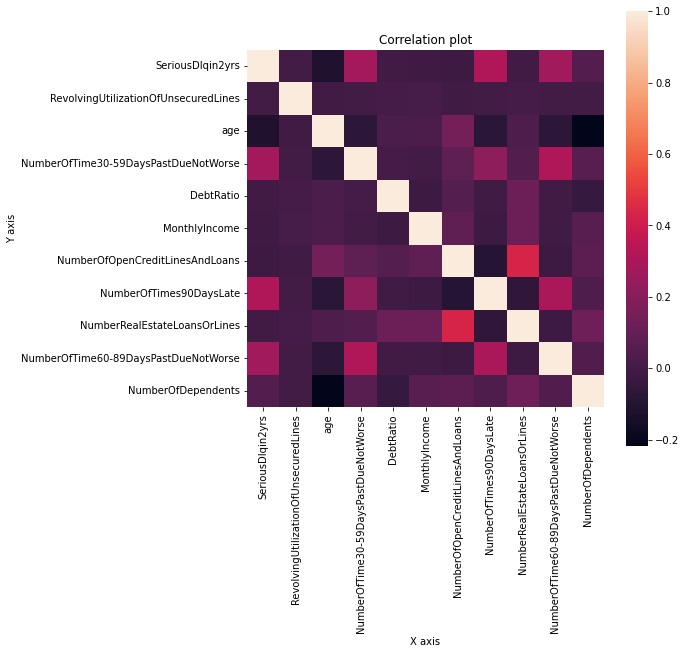

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, square=True)
plt.title('Correlation plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

Уберем переменную числа открытых кредитов под залог жилья

In [21]:
del df_altered['NumberRealEstateLoansOrLines']

In [22]:
df_altered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149731 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149731 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149731 non-null  float64
 2   age                                   149731 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149731 non-null  int64  
 4   DebtRatio                             149731 non-null  float64
 5   MonthlyIncome                         149731 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149731 non-null  int64  
 7   NumberOfTimes90DaysLate               149731 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  149731 non-null  int64  
 9   NumberOfDependents                    149731 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 12.6 MB


Осталось только 9 признаков и 149731 наблюдение

Можно теперь посмотреть на корреляцию признаков с таргетом отдельно

In [23]:
X = df_altered.drop('SeriousDlqin2yrs', axis=1)
y = df_altered['SeriousDlqin2yrs']

features = X.columns

In [24]:
TEST_SIZE = 0.25

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train = pd.DataFrame(ss.transform(X_train), columns=features)
X_test = pd.DataFrame(ss.transform(X_test), columns=features)

In [27]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.025282,-1.243534,-0.351712,-0.159984,0.077645,0.297237,-0.18448,-0.195569,0.239744
1,-0.020870,-1.446940,1.085989,-0.160133,-0.352954,-0.287019,-0.18448,-0.195569,1.144041
2,-0.021297,0.180304,-0.351712,-0.159923,-0.234467,-0.092267,-0.18448,-0.195569,-0.664554
3,-0.025221,1.536341,-0.351712,-0.160110,-0.116125,-0.287019,-0.18448,-0.195569,0.239744
4,-0.025265,0.790521,-0.351712,0.601859,-0.073065,-0.092267,-0.18448,-0.195569,-0.664554


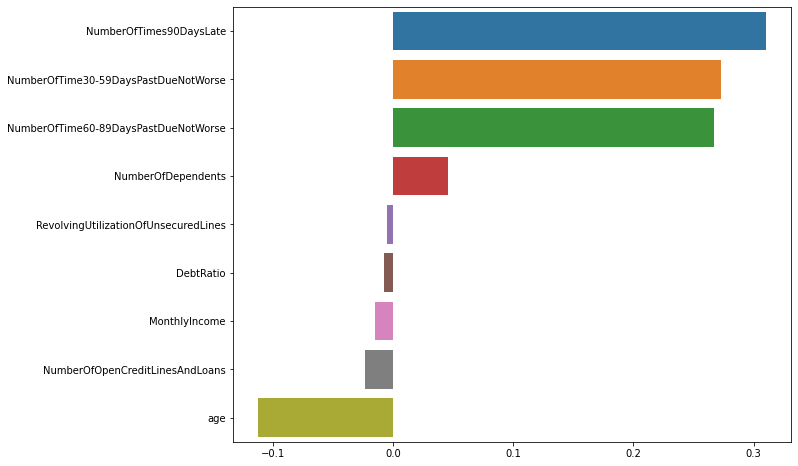

In [28]:
correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in features
}
sorted_correlations = sorted(
    correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(10, 8)

Есть три признака, которые очень хорошо коррелируют с зависимой переменной, и один - средне. Это должно помочь получить хороший результат линейной моделью

## Logistic Regression

Посмотрим на распределение целевой переменной

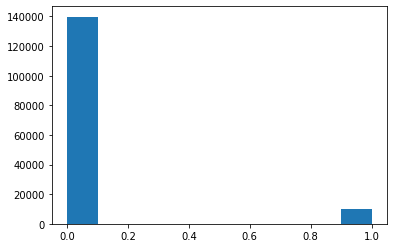

In [29]:
plt.hist(df_altered['SeriousDlqin2yrs'])
plt.show()

Видно, что присутствует дисбаланс классов.

Так как у нас есть несбалансированные классы (клиентов без просрочки значительно больше клиентов с просрочкой), можно попробовать с этим что-то сделать. Один из вариантов - balanced weights при использовании логистической регрессии

Logistic regression with balanced weights

In [30]:
from sklearn.linear_model import LogisticRegression

logit_reg_bal = LogisticRegression(class_weight='balanced')
logit_reg_bal.fit(X_train, y_train)

logit_reg = LogisticRegression()
logit_reg.fit(X_train, y_train)

train_prediction_bal = logit_reg_bal.predict_proba(X_train)[:, 1]
test_prediction_bal = logit_reg_bal.predict_proba(X_test)[:, 1]

train_prediction = logit_reg.predict_proba(X_train)[:, 1]
test_prediction = logit_reg.predict_proba(X_test)[:, 1]

AUC ROC on Train is 0.8111 and 0.8164 with weighting
AUC ROC on Test is 0.8156 and 0.8196 with weighting
Area Under Precision Recall Curve on Train is 0.3411 and 0.3463 with weighting
Area Under Precision Recall Curve on Test is 0.3600 and 0.3640 with weighting


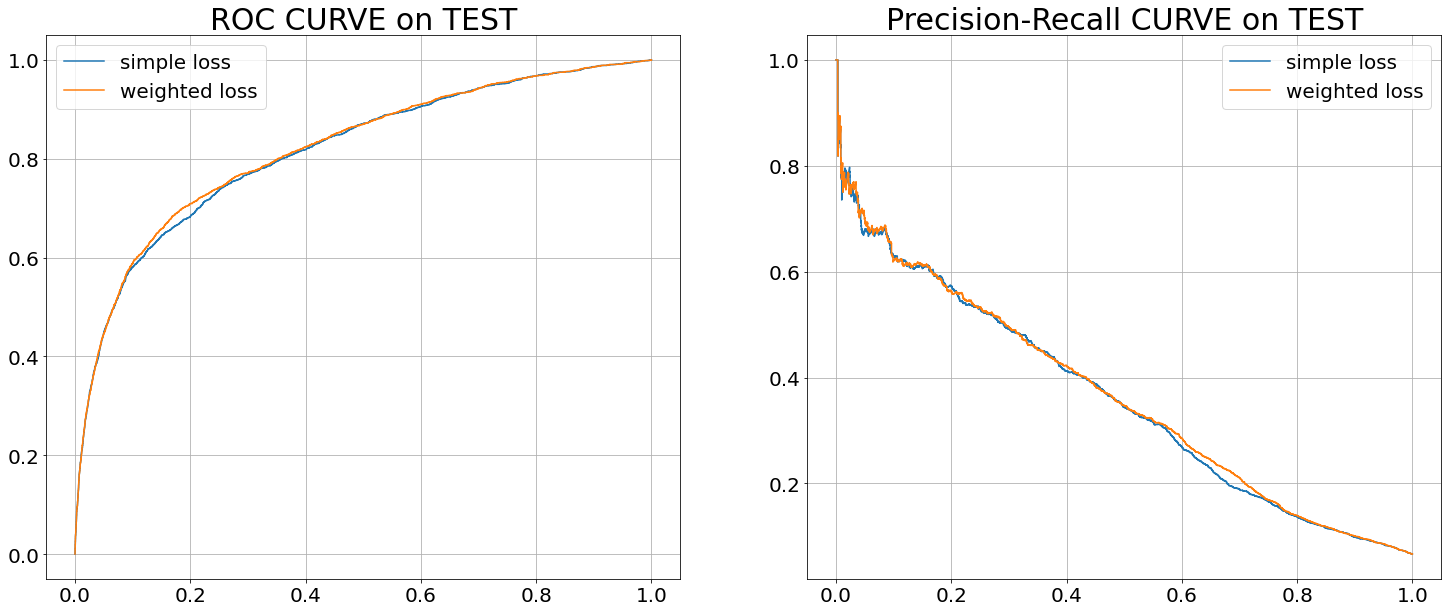

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, average_precision_score

roc_auc_train = roc_auc_score(y_train, train_prediction)
roc_auc_train_bal = roc_auc_score(y_train, train_prediction_bal)
roc_auc_test = roc_auc_score(y_test, test_prediction)
roc_auc_test_bal = roc_auc_score(y_test, test_prediction_bal)

print(
    f'AUC ROC on Train is {roc_auc_train:.4f} and {roc_auc_train_bal:.4f} with weighting')
print(
    f'AUC ROC on Test is {roc_auc_test:.4f} and {roc_auc_test_bal:.4f} with weighting')

prc_auc_train = average_precision_score(y_train, train_prediction)
prc_auc_train_bal = average_precision_score(y_train, train_prediction_bal)
prc_auc_test = average_precision_score(y_test, test_prediction)
prc_auc_test_bal = average_precision_score(y_test, test_prediction_bal)

print(
    f'Area Under Precision Recall Curve on Train is {prc_auc_train:.4f} and {prc_auc_train_bal:.4f} with weighting')
print(
    f'Area Under Precision Recall Curve on Test is {prc_auc_test:.4f} and {prc_auc_test_bal:.4f} with weighting')

prc = precision_recall_curve(y_test, test_prediction)
prc_bal = precision_recall_curve(y_test, test_prediction_bal)
ac = roc_curve(y_test, test_prediction)
ac_bal = roc_curve(y_test, test_prediction_bal)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

ax[0].plot(ac[0], ac[1], label='simple loss')
ax[0].plot(ac_bal[0], ac_bal[1], label='weighted loss')
ax[0].set_title('ROC CURVE on TEST', fontsize=30)

ax[1].plot(prc[1], prc[0], label='simple loss')
ax[1].plot(prc_bal[1], prc_bal[0], label='weighted loss')
ax[1].set_title('Precision-Recall CURVE on TEST', fontsize=30)

for i in ax:
    i.tick_params(labelsize=20)
    i.grid()
    i.legend(fontsize=20)

plt.show()

P.S. precision - x axis, recall - y axis

Для справки (взято с WIkipedia.org)

ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

Количественная интерпретация ROC даёт показатель AUC (англ. Area Under Curve, площадь под кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

Взято с документации Scikit-learn

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Что тут видно:
1. Добавление балансировки немного улучшило результат
1. AUC-ROC достаточно неплохой: >80% на тесте. Однако у этого параметра есть один большой минус - он будет показывать крайне хороший результат даже для плохой модели, если присутствует сильный дисбаланс классов (как раз наш случай). Поэтому необходимо ещё посмотреть на кривую precision-recall
3. Площадь под precision-recall не очень большая. Это значит, что наша модель при удачном пороге найдет меньше половины реально ушедших в просрочку клиентов, и меньше половины, кого она указала, как получивший дефолт, реально уйдут в просрочку (medium recall, medium precision). Скорее всего, с помощью бустинга удастся получить результат получше

In [32]:
coef_table = pd.DataFrame(
    {'features': list(features), 'weights': list(logit_reg_bal.coef_[0])})
coef_table = coef_table.sort_values(by='weights')
coef_table

,features,weights
1,age,-0.449728
4,MonthlyIncome,-0.220886
0,RevolvingUtilizationOfUnsecuredLines,-0.078271
3,DebtRatio,-0.052484
8,NumberOfDependents,0.057201
5,NumberOfOpenCreditLinesAndLoans,0.112637
7,NumberOfTime60-89DaysPastDueNotWorse,0.366560
2,NumberOfTime30-59DaysPastDueNotWorse,0.519505
6,NumberOfTimes90DaysLate,0.628506


В целом, что и ожидалось - **age** был скорелирован отрицательно и по модулю коэффициент был достаточно большим - регрессия дала этому признаку отрицательный вес + по модулю достаточно большой. И большой положительный вес был дан трем признакам - **NumberOfTimes90DaysLate**, **NumberOfTime30-59DaysPastDueNotWorse** и **NumberOfTime60-89DaysPastDueNotWorse**.

Это звучит правдоподобно: чем выше возраст, тем, в среднем, более стабилен финансово человек;
если ранее у человек была просрочка 30-59, 60-89, 90+, то выше вероятность, что у него есть трудности с выплатами кредитов - скорее всего, он не вернет и в будущем

## LightGBM

In [33]:
from lightgbm import LGBMClassifier, Dataset
from sklearn.model_selection import GridSearchCV

Для начала воспользуемся *GridSearchCV* для поиска оптимального набора параметров обучения

In [34]:
param_dist = {"max_depth": [2, 4, 6, 8],
              "n_estimators": [50, 100, 250, 500],
              "learning_rate": [0.1, 0.05, 0.01], }

lgbm_clf = LGBMClassifier(objective="binary")

grid_search = GridSearchCV(
    lgbm_clf, n_jobs=-1, param_grid=param_dist, cv=5, verbose=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


LGBMClassifier(learning_rate=0.05, max_depth=6, objective='binary')

In [35]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}

In [36]:
lgbm_clf = LGBMClassifier(learning_rate=0.05, max_depth=6, n_estimators=100)
lgbm_clf.fit(X_train, y_train)

train_prediction_lgbm = lgbm_clf.predict_proba(X_train)[:, 1]
test_prediction_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]

AUC ROC on Train is 0.8758 - LGBM; 0.8164 - Logreg
AUC ROC on Test is 0.8658 - LGBM; 0.8196 - Logreg
Area Under Precision Recall Curve on Train is 0.4441 - LGBM; 0.3463 - Logreg
Area Under Precision Recall Curve on Test is 0.4014 - LGBM; 0.3640 - Logreg


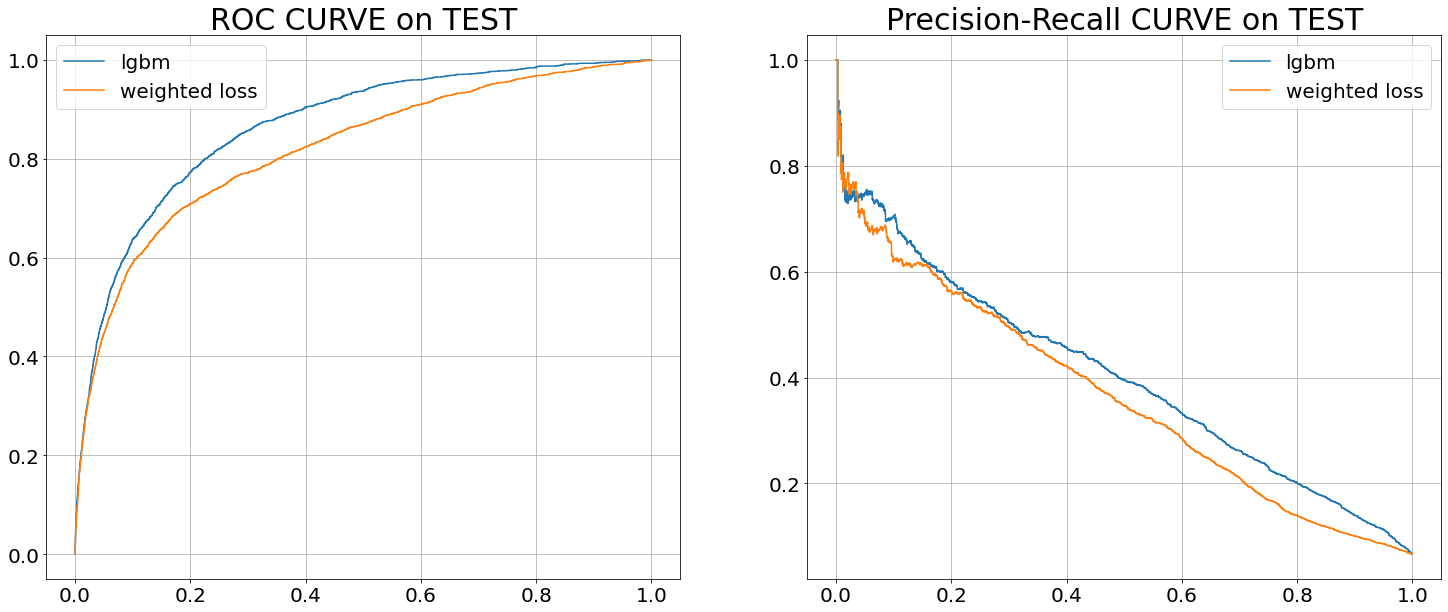

In [37]:
roc_auc_train_lgbm = roc_auc_score(y_train, train_prediction_lgbm)
roc_auc_test_lgbm = roc_auc_score(y_test, test_prediction_lgbm)

print(
    f'AUC ROC on Train is {roc_auc_train_lgbm:.4f} - LGBM; {roc_auc_train_bal:.4f} - Logreg')
print(
    f'AUC ROC on Test is {roc_auc_test_lgbm:.4f} - LGBM; {roc_auc_test_bal:.4f} - Logreg')

prc_auc_train_lgbm = average_precision_score(y_train, train_prediction_lgbm)
prc_auc_test_lgbm = average_precision_score(y_test, test_prediction_lgbm)

print(
    f'Area Under Precision Recall Curve on Train is {prc_auc_train_lgbm:.4f} - LGBM; {prc_auc_train_bal:.4f} - Logreg')
print(
    f'Area Under Precision Recall Curve on Test is {prc_auc_test_lgbm:.4f} - LGBM; {prc_auc_test_bal:.4f} - Logreg')


prc_lgbm = precision_recall_curve(y_test, test_prediction_lgbm)
ac_lgbm = roc_curve(y_test, test_prediction_lgbm)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

ax[0].plot(ac_lgbm[0], ac_lgbm[1], label='lgbm')
ax[0].plot(ac_bal[0], ac_bal[1], label='weighted loss')
ax[0].set_title('ROC CURVE on TEST', fontsize=30)

ax[1].plot(prc_lgbm[1], prc_lgbm[0], label='lgbm')
ax[1].plot(prc_bal[1], prc_bal[0], label='weighted loss')
ax[1].set_title('Precision-Recall CURVE on TEST', fontsize=30)

for i in ax:
    i.tick_params(labelsize=20)
    i.grid()
    i.legend(fontsize=20)

plt.show()

Качество улучшилось: и AUC-ROC, и площадь под PR кривой. 

Бустинги для табличных данных крайне эффективны

## Сравнение с CatBoost

Я добавил код из работы Астемира, дабы сравнить, как справились разные версии бустингов - LightGMB и CatBoost

In [38]:
from catboost import CatBoostClassifier, Pool

train_set = Pool(X_train, y_train)
test_set = Pool(X_test, y_test)

gbm = CatBoostClassifier(iterations=200,
                         depth=2,
                         learning_rate=0.1,
                         loss_function='Logloss',
                         eval_metric='AUC',
                         verbose=False)
gbm.fit(train_set, eval_set=test_set)
test_prediction_cat = gbm.predict_proba(X_test)[:, 1]

AUC ROC on Test is 0.8658 - LGBM; 0.8640 - Catboost
Area Under Precision Recall Curve on Test is 0.4014 - LGBM; 0.4003 - Catboost


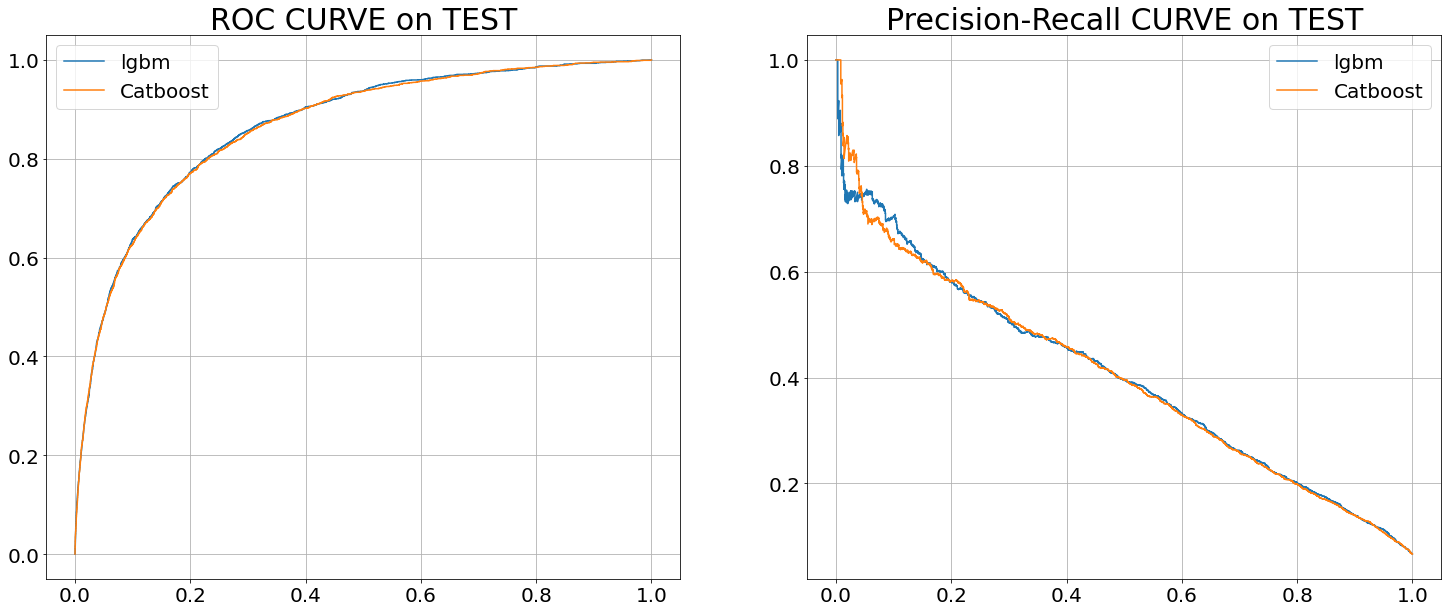

In [39]:
roc_auc_test_cat = roc_auc_score(y_test, test_prediction_cat)

print(
    f'AUC ROC on Test is {roc_auc_test_lgbm:.4f} - LGBM; {roc_auc_test_cat:.4f} - Catboost')

prc_auc_test_cat = average_precision_score(y_test, test_prediction_cat)

print(
    f'Area Under Precision Recall Curve on Test is {prc_auc_test_lgbm:.4f} - LGBM; {prc_auc_test_cat:.4f} - Catboost')


prc_cat = precision_recall_curve(y_test, test_prediction_cat)
ac_cat = roc_curve(y_test, test_prediction_cat)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

ax[0].plot(ac_lgbm[0], ac_lgbm[1], label='lgbm')
ax[0].plot(ac_cat[0], ac_cat[1], label='Catboost')
ax[0].set_title('ROC CURVE on TEST', fontsize=30)

ax[1].plot(prc_lgbm[1], prc_lgbm[0], label='lgbm')
ax[1].plot(prc_cat[1], prc_cat[0], label='Catboost')
ax[1].set_title('Precision-Recall CURVE on TEST', fontsize=30)

for i in ax:
    i.tick_params(labelsize=20)
    i.grid()
    i.legend(fontsize=20)

plt.show()

В целом, они примерно одинаково справились с задачей.

In [40]:
# CatBoost
coef_table = pd.DataFrame(
    {'features': list(features), 'importances': list(lgbm_clf.feature_importances_)})
coef_table = coef_table.sort_values(by='importances', ascending=False)
coef_table

,features,importances
3,DebtRatio,537
1,age,440
0,RevolvingUtilizationOfUnsecuredLines,432
4,MonthlyIncome,400
5,NumberOfOpenCreditLinesAndLoans,392
2,NumberOfTime30-59DaysPastDueNotWorse,262
7,NumberOfTime60-89DaysPastDueNotWorse,244
6,NumberOfTimes90DaysLate,222
8,NumberOfDependents,71


In [41]:
# LightGBM
coef_table = pd.DataFrame(
    {'features': list(features), 'importances' : list(gbm.get_feature_importance())})
coef_table = coef_table.sort_values(by='importances', ascending=False)
coef_table

,features,importances
0,RevolvingUtilizationOfUnsecuredLines,43.179115
2,NumberOfTime30-59DaysPastDueNotWorse,17.073338
6,NumberOfTimes90DaysLate,15.688359
7,NumberOfTime60-89DaysPastDueNotWorse,8.459329
1,age,6.672599
5,NumberOfOpenCreditLinesAndLoans,3.488317
3,DebtRatio,3.333716
4,MonthlyIncome,2.022197
8,NumberOfDependents,0.083030


Интересно, что для разных методов бустинга наиболее важные признаки различны. Скорее всего, это преимущественно связано с разницей в архитектуре деревьев: само строение дерева (симметричные у **CatBoost** и *leaf-wise growth* у **LightGBM**) и разделение в узлах.

Видно, что **RevolvingUtilizationOfUnsecuredLines** в обоих случаях стал важным признаком (у **LightGBM** с большим отрывом от остальных), а **NumberOfDependents** - наименее важным.

Можно сказать, что наличие большого количества денег, скорее всего, сильно влияет на то, сможет ли человек отдать кредит или нет

In [42]:
from sklearn import metrics

i = .1
while i <= .9:
    lgbm_classes = (test_prediction_lgbm > i)
    cat_classes = (test_prediction_cat > i)

    precision_lgbm = metrics.precision_score(y_test, lgbm_classes)
    precision_cat = metrics.precision_score(y_test, cat_classes)

    recall_lgbm = metrics.recall_score(y_test, lgbm_classes)
    recall_cat = metrics.recall_score(y_test, cat_classes)

    print(f'For threshold = {i}')
    print(
        f'Precision: LightGBM - {precision_lgbm:.4f}, Catboost - {precision_cat:.4f}')
    print(
        f'Recall: LightGBM - {recall_lgbm:.4f}, Catboost - {recall_cat:.4f}', '\n')

    i += .1

For threshold = 0.1
Precision: LightGBM - 0.2728, Catboost - 0.2864
Recall: LightGBM - 0.6790, Catboost - 0.6613 

For threshold = 0.2
Precision: LightGBM - 0.3941, Catboost - 0.4012
Recall: LightGBM - 0.5030, Catboost - 0.4861 

For threshold = 0.30000000000000004
Precision: LightGBM - 0.4605, Catboost - 0.4742
Recall: LightGBM - 0.3937, Catboost - 0.3761 

For threshold = 0.4
Precision: LightGBM - 0.5303, Catboost - 0.5303
Recall: LightGBM - 0.2744, Catboost - 0.2780 

For threshold = 0.5
Precision: LightGBM - 0.6016, Catboost - 0.5833
Recall: LightGBM - 0.1796, Catboost - 0.1969 

For threshold = 0.6
Precision: LightGBM - 0.7037, Catboost - 0.6373
Recall: LightGBM - 0.0992, Catboost - 0.1249 

For threshold = 0.7
Precision: LightGBM - 0.7500, Catboost - 0.7104
Recall: LightGBM - 0.0277, Catboost - 0.0522 

For threshold = 0.7999999999999999
Precision: LightGBM - 0.0000, Catboost - 0.8788
Recall: LightGBM - 0.0000, Catboost - 0.0117 

For threshold = 0.8999999999999999
Precision: Lig

C:\Users\Marat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


При пороге 0.2 50% реально ушедших в просрочку 90+ клиентов предсказывается нашей моделью, 40% из предсказанных действительно уходят в просрочку 90+